# Learning to use Python for more advanced data manipulation

#### Welcome to the second workshop on Python!

Note: Depending on your programming journey, a lot of this may seem new. My advice is:

1. Don't panic.
2. Read the code - then read the documentation. Google anything weird.
3. Comment wherever you can to secure learning or question unknowns.
4. Take. It. Slow. Remember the time frame.
5. Persevere and revisit independently - treat this notebook like a reference and a starting point.

<hr>

<a id='Contents'></a>
## Contents

This workshop builds on what we saw in the previous workshop. We will be using a dataset of films, which will need to be in a ``data`` folder located in the same folder as this Jupyter notebook.

In this workshop, we will:<b>

- [Explore and navigate the folder structure](#files)
- [Import an Excel sheet](#sheet)
- [Explore the sheet](#explore)
- [Import and combine multiple sheets and multiple Excel files](#xlsx)
- [Clean up and prepare the combined dataset](#prepare)
- [Exploring strings](#strings)
- [Putting it all together: How does the freqency of names in Synopses change across genres?](#conclusion)
- [Stretch practice](#stretch)
- [Further reading](#further)

</b>

<a id='Concepts'></a>
### Python concepts covered

- Containers, such as [lists](#lists), [dictionaries](#dict) and [sets](#set)
- [for](#for) loops and the Pandas [apply](#apply) method
- Selectively run code using [if](#if) statements
- [Creating your own functions](#functions)
- Searching through [strings](#strings) and using [regular expressions](#re) 


### Python packages and modules we will use

Packages we will use:
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) for manipulating tabular data

Standard library modules we will use:
- [pathlib](https://docs.python.org/3/library/pathlib.html) for manipulating file and folder paths
- [ast](https://docs.python.org/3/library/ast.html) we will only need one function from

In [5]:
import pathlib
import ast
import pandas as pd

<a id='files'></a>
## Explore and navigate the folder structure
[Back to Contents](#Contents)

Last time we saw how to use strings as file and folder paths. This time we are going to use ``pathlib`` to treat paths as objects. This will allow us make fewer errors in manipulating our paths. It will also give us more power to ask questions about the path by thinking about it as something with attributes, such as having parent folders, a name and a type (folder, file, link etc).

We can start by using the ``cwd`` function to return our *current working directory* as a path object. For us, the current working directory will be where our current notebook is located! 

More details on pathlib methods can be found [here](https://docs.python.org/3/library/pathlib.html#methods) and a nice tutorial can be found on [Practical Business Python](https://pbpython.com/pathlib-intro.html)

In [7]:
current_path = pathlib.Path.cwd()
current_path

WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025')

If our data is located in the *data* subfolder we can create a path to that folder by dividing by the string ``'data'``

In [9]:
data_path = current_path / 'data'
data_path

WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data')

To search the folder we can use the path method ``glob``. glob takes a search *pattern*. 

- ``*`` pattern means find *anything in the folder*
- ``**`` pattern means find *this directory and all subdirectories*

So, by combining them, ``**/*`` means find *anything in this directory or all subdirectories* 



In [11]:
data_path.glob('**/*')

<generator object Path.glob at 0x00000274B2467EF0>

``glob`` returns a *generator object*. These return a sequence of objects 

[Here is more information on Generators](https://docs.python.org/3/tutorial/classes.html#generators)

To force it to output, we can pass it into a ***list***

<a id='lists'></a>
#### Lists
An ordered container for any any data types, inlcuding other lists! It is useful for flat databases or tables.

- It can be extended
- Can contain duplicate values
- It is mutable – values can be changed

In the same way that we create a string object by ``"putting quotes around some text"``, we can create a list object ``['in', 'this', 'way']``

To convert something to a list we can use the ``list`` function. This will work for our generator object.

[W3School's introduction](https://www.w3schools.com/python/python_lists.asp) and the [official Python description](https://docs.python.org/3/library/stdtypes.html?highlight=numerical%20operators#lists)

In [14]:
list(data_path.glob('**/*'))

[WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/2019-07'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/2019-08'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/2019-09'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/address.csv'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/assesment_data.csv'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/cashflow'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshir

We can be more specific in our search for files by specifying more of the details. For example, if we are only interested in ``.xlsx`` files we can change the search pattern accordingly:

In [16]:
list(data_path.glob('**/*.xlsx'))

[WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/customer.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/movies_de.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/movies_en.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/movies_es.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/movies_fr.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - University of Hertfordshire/dataanalyticslab/Python Workshop/Python Data Analytics Workshop 2025/data/movies_hi.xlsx'),
 WindowsPath('C:/Users/sayar/OneDrive - U

<a id='for'></a>
#### Looping through tasks
One of the most common tasks in computing is stepping through a sequence of data and performing a given action. Python has a  simple, flexible interface to this kind of iteration via the `for` loop.

> <span style="color:green;font-weight:bold">for</span> element <span style="color:green;font-weight:bold">in</span> iterable_object<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*

Note we used indentation (the tab key or 4 spaces) to diffentiate blocks of code that are executed within a condition.

<img src="https://github.com/domjhunt/python_basics/blob/main/images/for_loop.png?raw=true" alt="Corndel" width =400 height=329>

To clean up the reading of the files, we can look at just their names using the ``name`` path property

In [19]:
for f in data_path.glob('**/*.xlsx'):
    print(f.name)

customer.xlsx
movies_de.xlsx
movies_en.xlsx
movies_es.xlsx
movies_fr.xlsx
movies_hi.xlsx
movies_it.xlsx
movies_ja.xlsx
movies_ru.xlsx


<a id='if'></a>
#### Selectively run code using ``if`` statements

`if` statements are used to limit code to run only if a specified condition is `True`:
> <span style="color:green;font-weight:bold">if</span> condition<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*

Note: we used indentation (the tab key or 4 spaces) to diffentiate blocks of code that are executed within a condition.

If you need more that one condition, you can include subsequent ``elif`` statements:
> <span style="color:green;font-weight:bold">if</span> condition<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*<br>
<span style="color:green;font-weight:bold">elif</span> *another condition*<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*

A catch all other possibilities can be achieved with an ``else`` statement:
> <span style="color:green;font-weight:bold">if</span> condition<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*<br>
<span style="color:green;font-weight:bold">elif</span> *another condition*<span style="color:green;font-weight:bold">:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*<br>
<span style="color:green;font-weight:bold">else:</span><br>
&emsp;&emsp;&emsp;&emsp;*run some code here*

<img src="https://github.com/domjhunt/python_basics/blob/main/images/if_elif_else.png?raw=true" alt="Corndel" width =400 height=329>

We can use if statements to filter the files found. If we want to find the files that begin with *movies* we can use the string method ``startswith``. The details can be found [here](https://docs.python.org/3/library/stdtypes.html?highlight=startswith#str.startswith)

To help tidy up what we output, we can choose to show only the main body of the filename by using the ``stem`` property.

In [23]:
for f in data_path.glob('**/*'):
            if f.name.startswith('movies'):
                        print(f.stem)

movies_dataset
movies_de
movies_en
movies_es
movies_fr
movies_hi
movies_it
movies_ja
movies_ru


<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

For the license:   
> <span style="color:green">for</span> f <span style="color:green">in</span> data_path.glob(<span style="color:red">'\*\*/\*.txt'</span>):<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">if</span> f.stem.startswith(<span style="color:red">'license'</span>):<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:green">print</span>(f.stem)

For the readme:   
> <span style="color:green">for</span> f <span style="color:green">in</span> data_path.glob(<span style="color:red">'\*\*/\*.txt'</span>):<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">if</span> f.stem.startswith(<span style="color:red">'readme'</span>):<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:green">print</span>(f.stem)
    
</details>

<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> Can you modify the above code to select only the <tt>license.txt</tt>? 
    <li> Can you modify the above code to select only the <tt>readme.txt</tt>?
</ul></div>

<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> Looping through lists is a very common task and there is more than one way to do it. He we will look at another. 
    <li> We previously used a <tt>for</tt> loop to loop through the returned elements of the <tt>glob</tt> generator object. We could have also looped through the list we created using the values returned by <tt>glob</tt>, as shown below. 
    <li> Here we would like you to transform this <tt>for</tt> loop below from looping through the elements of a list to instead looping through values we can use to index the list. 
    <li> We can use the <tt><a href="https://docs.python.org/3/library/stdtypes.html?#range">range</a></tt> function to generate a sequence of integers. You can loop through the sequence and use these as indices to return individual elements in the list. 
    <li> To generate the range of values, you will also need to know the length of the list. This you can find with the function <tt><a href="https://docs.python.org/3/library/functions.html?#len">len</a></tt>
</ul></div>


<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

> data_folder_file_path_list = <span style="color:green">list</span>(data_path.glob(<span style="color:red">'\*\*/\*'</span>))<br>
<br>
<span style="color:green">for</span> i <span style="color:green">in</span> <span style="color:green">range</span>(<span style="color:green">len</span>(data_folder_file_path_list)):<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">print</span>(data_folder_file_path_list[i].stem)
    
</details>

<div class="alert alert-block alert-info">
<b>Stretch task:</b> <ul>
    <li> Cheddar cheese is split into four age categories: 'mild', 'mature' (more than 6 months), 'extra mature' (more than 12 months) and 'vintage' (more than 18 months).
    <li> Expand the code below to create an if statement that will return a string describing the age category of any cheddar cheese and store it in the label <tt>age_group</tt>
    <li> Below you can see that in the <tt>print</tt> statement we use an <a href='https://docs.python.org/3/tutorial/inputoutput.html#tut-f-strings'>f-string format</a>. <a href='https://betterprogramming.pub/3-useful-python-f-string-tricks-you-probably-dont-know-f908f7ed6cf5'>Here is a nice tutorial on their use</a>
</ul></div>


<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

```python
cheddar_age = 10

if cheddar_age >= 18:
    age_group = 'vintage'
elif cheddar_age > 12:
    age_group = 'extra mature'
elif cheddar_age > 6:
    age_group = 'mature'
else:
    age_group = 'mild'

print(f'This {cheddar_age} month old cheddar is {age_group}')


<div class="alert alert-block alert-info">
<b>Stretch task:</b> <ul>
    <li> Now do this for multiple ages of cheddar
</ul></div>

In [32]:
cheddar_ages = [10, 5, 22, 13, 3, 8]

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

```python
cheddar_ages = [10, 5, 22, 13, 3, 8]

for cheddar_age in cheddar_ages:
    if cheddar_age >= 18:
        age_group = 'vintage'
    elif cheddar_age > 12:
        age_group = 'extra mature'
    elif cheddar_age > 6:
        age_group = 'mature'
    else:
        age_group = 'mild'

    print(f'This {cheddar_age} month old cheddar is {age_group}')


<a id='sheet'></a>
## Import a single Excel sheet
[Back to Contents](#Contents)

We can read in an excel file sheet using the Pandas ``read_excel`` method. By default it only reads in the first sheet.

[Here is the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html?highlight=read_excel)

In [35]:
de_data_sheet = pd.read_excel(data_path / 'movies_de.xlsx')
de_data_sheet

,id,imdb_id,original_title,title,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count
0,28627,tt0003419,Der Student von Prag,The Student of Prague,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",de,A poor student rescues a beautiful countess an...,2.581248,1913-08-22,83,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,10
1,48214,tt0009062,Das fidele Gefängnis,The Merry Jail,"[{'id': 35, 'name': 'Comedy'}]",de,A neglected wife disguises herself in order to...,0.215726,1917-11-30,48,[],9.5,1
2,48263,tt0010281,Ich möchte kein Mann sein,I Don't Want to Be a Man,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",de,"A teenage tomboy, tired of being bossed around...",0.999418,1918-10-01,45,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.9,7
3,174928,tt0008950,Carmen,Carmen,"[{'id': 18, 'name': 'Drama'}]",de,"The tragic story of Don Jose, a Spanish cavalr...",0.259942,1918-12-20,80,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",4.8,4
4,44441,tt0009878,Anders als die Andern,Different from the Others,"[{'id': 18, 'name': 'Drama'}]",de,Conrad Veidt plays a famous musician who is bl...,0.289991,1919-05-28,51,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.0,7
5,48591,tt0009893,Die Austernprinzessin,The Oyster Princess,"[{'id': 35, 'name': 'Comedy'}]",de,A pampered American oyster tycoon decides to b...,0.352892,1919-06-16,60,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.4,11
6,28629,tt0010821,Unheimliche Geschichten,Eerie Tales,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",de,"At midnight in an antiquarian bookshop, Death,...",0.445493,1919-11-05,112,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.0,3


<a id='explore'></a>
## Explore the data in the sheet
[Back to Contents](#Contents)

Lets take some time to explore this dataset

In [37]:
de_data_sheet.dtypes

id                     int64
imdb_id               object
original_title        object
title                 object
genres                object
original_language     object
overview              object
popularity           float64
release_date          object
runtime                int64
spoken_languages      object
vote_average         float64
vote_count             int64
dtype: object

The ``release_date`` is text. The genres and spoken languages are complicated, so are listed as ``Objects``. 

Lets start by tansforming the format of ``release_date``. This can be done using the Pandas function ``to_datetime``. We can use the ``format`` keyword to specify the format of the date.

The documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)

In [39]:
de_data_sheet['release_date'] = pd.to_datetime(de_data_sheet['release_date'], format='%Y-%m-%d')
de_data_sheet.dtypes

id                            int64
imdb_id                      object
original_title               object
title                        object
genres                       object
original_language            object
overview                     object
popularity                  float64
release_date         datetime64[ns]
runtime                       int64
spoken_languages             object
vote_average                float64
vote_count                    int64
dtype: object

Now lets look at the genres

In [41]:
de_data_sheet['genres']

0    [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...
1                       [{'id': 35, 'name': 'Comedy'}]
2    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
3                        [{'id': 18, 'name': 'Drama'}]
4                        [{'id': 18, 'name': 'Drama'}]
5                       [{'id': 35, 'name': 'Comedy'}]
6    [{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...
Name: genres, dtype: object

To look at the individual values in the column, we are going to have to specify the record we are interested in. We can do so using the ``loc`` method.

> DataFrame.loc\[*location_id*\]

loc takes as a row reference the *index* values or a series of Boolean values (if you are filtering by a condition). If you would like all rows you can use ``:``

The documentation for loc can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html?). If you want to reference by row number you can also use [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

In [43]:
de_data_sheet.loc[:]

,id,imdb_id,original_title,title,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count
0,28627,tt0003419,Der Student von Prag,The Student of Prague,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",de,A poor student rescues a beautiful countess an...,2.581248,1913-08-22,83,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,10
1,48214,tt0009062,Das fidele Gefängnis,The Merry Jail,"[{'id': 35, 'name': 'Comedy'}]",de,A neglected wife disguises herself in order to...,0.215726,1917-11-30,48,[],9.5,1
2,48263,tt0010281,Ich möchte kein Mann sein,I Don't Want to Be a Man,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",de,"A teenage tomboy, tired of being bossed around...",0.999418,1918-10-01,45,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.9,7
3,174928,tt0008950,Carmen,Carmen,"[{'id': 18, 'name': 'Drama'}]",de,"The tragic story of Don Jose, a Spanish cavalr...",0.259942,1918-12-20,80,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",4.8,4
4,44441,tt0009878,Anders als die Andern,Different from the Others,"[{'id': 18, 'name': 'Drama'}]",de,Conrad Veidt plays a famous musician who is bl...,0.289991,1919-05-28,51,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.0,7
5,48591,tt0009893,Die Austernprinzessin,The Oyster Princess,"[{'id': 35, 'name': 'Comedy'}]",de,A pampered American oyster tycoon decides to b...,0.352892,1919-06-16,60,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.4,11
6,28629,tt0010821,Unheimliche Geschichten,Eerie Tales,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",de,"At midnight in an antiquarian bookshop, Death,...",0.445493,1919-11-05,112,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.0,3


loc can also allow us to specify combinations of rows and columns

In [45]:
de_data_sheet.loc[0, 'genres']

"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name': 'Horror'}]"

We can see that this is a list with two *dictionaries* contained in a string. We can use the ``literal_eval`` function in the *ast* module of the Python Standard Library. This will allow us to *Safely evaluate ... a string containing a Python literal or container display*. I.e. it will turn a string containing a representation of a standard Python object into that opject.

The ``literal_eval`` documentation is [here](https://docs.python.org/3/library/ast.html#ast.literal_eval)

In [47]:
genres_0 = ast.literal_eval(de_data_sheet.loc[0, 'genres'])
genres_0

[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name': 'Horror'}]

We can extract the first dictionary from the list by using its index value: *0*

In [49]:
genres_0[0]

{'id': 18, 'name': 'Drama'}

<a id='dict'></a>
#### Dictionaries

Used for key-value databases. They are made of pairs of *keys* and *values*.

They are expressed as:
> {*key_1*: *value_1*, *keys_2*:*value_2*}

- `keys` uniquely identify the `values`
- `keys` are immutable: they cannot be changed, so can only be made from immutable datatypes (e.g. numbers, strings, tuples etc)
- `values` can be anything and can change
- Python remembers the order of the keys

[Here is the Python description](https://docs.python.org/3/library/stdtypes.html#dict)

We can return the dictionary keys using the [``keys``](https://docs.python.org/3/library/stdtypes.html?#dict.keys) method and the values using the [``values``](https://docs.python.org/3/library/stdtypes.html?#dict.values) method

In [52]:
genres_0[0].keys()

dict_keys(['id', 'name'])

Keys can be used to access dictionary values in the same way as the index is used in a list. They can also be chained. We can ask for the *'name'* value using ``['name']``

In [54]:
genres_0[0]['name']

'Drama'

The same indexing used for lists can be used for strings. If we want the fourth character of *Drama* we can ask for it using ``[3]``

In [56]:
genres_0[0]['name'][3]

'm'

We can extract the genre names using a ``for`` loop

In [58]:
for g in genres_0:
    print(g['name'])

Drama
Horror


We can turn them into a list using the list ``append`` method. This will allow us to add the names to the list one at a time

In [60]:
genre_names = []
for g in genres_0:
    genre_names.append(g['name'])
genre_names

['Drama', 'Horror']

Let us turn this into a function

<a id='functions'></a>
#### Functions
Functions are a named, packaged piece of code with a set purpose. They allow code to be reused multiple times without having to repeat yourself. 

The same function can be applied to many different objects.

See *functional programming: Unit 1 Part 4 - Introduction to Programming Languages, page 14*

Function declarations follow the form:
> <span style="color:green">def</span> <span style="color:blue">function_name</span>(input_variables):<br>
&emsp;&emsp;&emsp;&emsp;# function code<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">return</span> output_object

Functions without a return statement automatically return the special Python object `None`. Note that a function can have any number of `return` statements.

In [63]:
def find_names(named_string):
    names = []
    for n in ast.literal_eval(named_string):
        names.append(n['name'])
    return names

<a id='apply'></a>
Pandas allows arbirary functions to be run on each row of a DataFrame using the ``apply`` method. We can run our new function on the genres column to extract the genre names

In [65]:
de_data_sheet['genres'].apply(find_names)

0               [Drama, Horror]
1                      [Comedy]
2             [Comedy, Romance]
3                       [Drama]
4                       [Drama]
5                      [Comedy]
6    [Fantasy, Horror, Mystery]
Name: genres, dtype: object

<div class="alert alert-block alert-info">
<b>Stretch task:</b> <ul>
    <li> <a href="https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions">List comprehension syntax</a> allows us to write simple for loops in one line to generate a list or dictionary. This approach also runs much faster.
    <li> Take the code from our <tt>find_names</tt> function and simplify and speed up the loop it contains.
</ul></div>

<details>
    <summary style="color:green;font-weight:bold">Click here for a hint</summary>

If you are stuck on how to approach writing a list comprehension, have a look at some other tutorials, such as the <a href="https://www.w3schools.com/python/python_lists_comprehension.asp">w3schools</a> one or <a href="https://towardsdatascience.com/how-to-convert-loops-to-list-comprehension-in-python-15efcc696759"><i>"How to Convert Loops to List Comprehensions in Python"</i></a>. For a more detailed one there is one on <a href="https://towardsdatascience.com/all-about-python-list-comprehension-14dd979ec0d1"><i>"All About Python List Comprehension"</i></a>.
    
</details>

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

> <span style="color:green">def</span> <span style="color:blue">find_names</span>(named_list):<br>
&emsp;&emsp;&emsp;&emsp;names = \[n\[<span style="color:red">'name'</span>\] <span style="color:green">for</span> n <span style="color:green">in</span> ast.literal_eval(named_list)\]<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">return</span> names
    
</details>

In [69]:
def find_names(named_list):
        names = [n['name'] for n in ast.literal_eval(named_list)]
        return names

<div class="alert alert-block alert-info">
<b>Stretch task:</b> <ul>
    <li> Sometime we only want to use a function once. Python allows for simple nameless functions to be created as <a href="https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda#lambda-expressions">lambda expressions</a>. The syntax is<br>
         <tt>lambda input_variable: <i>line of code using input_variable</i></tt>
    <li> Use a lambda function containing a list comprehension to replace our <i>find_names</i> function in extracting the genre names from the genre column and return them as a series of lists. You will need to use <tt>literal_eval</tt> to convert the <tt>genre</tt> strings.
</ul></div>

<details>
    <summary style="color:green;font-weight:bold">Click here for a hint</summary>

If you are stuck on how to approach writing the lambda function, have a look at some other tutorials, such as <a href="https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7">"Apply and Lambda usage in pandas"</a>.
    
</details>

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

> de_data_sheet.genres.apply(<span style="color:green">lambda</span> named_list: \[g\[<span style="color:red">'name'</span>\] <span style="color:green">for</span> g <span style="color:green">in</span> ast.literal_eval(named_list)\])

    
</details>

In [73]:
de_data_sheet.genres.apply(lambda named_list: [g['name'] for g in ast.literal_eval(named_list)])

0               [Drama, Horror]
1                      [Comedy]
2             [Comedy, Romance]
3                       [Drama]
4                       [Drama]
5                      [Comedy]
6    [Fantasy, Horror, Mystery]
Name: genres, dtype: object

<a id='xlsx'></a>
## Import and combine multiple sheets and multiple Excel files
[Back to Contents](#Contents)

Lets read in all the data from the spreadsheet. We can specify that we want all sheets in the file by setting the ``sheet_name`` keyword to ``None``

In [75]:
de_data = pd.read_excel(data_path / 'movies_de.xlsx', sheet_name=None)
de_data

{'1910-1919':        id    imdb_id             original_title                      title  \
 0   28627  tt0003419       Der Student von Prag      The Student of Prague   
 1   48214  tt0009062       Das fidele Gefängnis             The Merry Jail   
 2   48263  tt0010281  Ich möchte kein Mann sein   I Don't Want to Be a Man   
 3  174928  tt0008950                     Carmen                     Carmen   
 4   44441  tt0009878      Anders als die Andern  Different from the Others   
 5   48591  tt0009893      Die Austernprinzessin        The Oyster Princess   
 6   28629  tt0010821    Unheimliche Geschichten                Eerie Tales   
 
                                               genres original_language  \
 0  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...                de   
 1                     [{'id': 35, 'name': 'Comedy'}]                de   
 2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...                de   
 3                      [{'id': 18, 'name': 'Drama'}]

The sheets have been returned as a dictionary, with the sheet names as the keys and a DataFrame of the sheet as the values. We can find the sheet names by returning the keys of the dictionary.

In [77]:
de_data.keys()

dict_keys(['1910-1919', '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019'])

We can get the first sheet, which we were looking at before using the dictionary indexing for the first sheet: *'1910-1919'*

In [79]:
de_data['1910-1919']

,id,imdb_id,original_title,title,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count
0,28627,tt0003419,Der Student von Prag,The Student of Prague,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",de,A poor student rescues a beautiful countess an...,2.581248,1913-08-22,83,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,10
1,48214,tt0009062,Das fidele Gefängnis,The Merry Jail,"[{'id': 35, 'name': 'Comedy'}]",de,A neglected wife disguises herself in order to...,0.215726,1917-11-30,48,[],9.5,1
2,48263,tt0010281,Ich möchte kein Mann sein,I Don't Want to Be a Man,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",de,"A teenage tomboy, tired of being bossed around...",0.999418,1918-10-01,45,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.9,7
3,174928,tt0008950,Carmen,Carmen,"[{'id': 18, 'name': 'Drama'}]",de,"The tragic story of Don Jose, a Spanish cavalr...",0.259942,1918-12-20,80,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",4.8,4
4,44441,tt0009878,Anders als die Andern,Different from the Others,"[{'id': 18, 'name': 'Drama'}]",de,Conrad Veidt plays a famous musician who is bl...,0.289991,1919-05-28,51,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.0,7
5,48591,tt0009893,Die Austernprinzessin,The Oyster Princess,"[{'id': 35, 'name': 'Comedy'}]",de,A pampered American oyster tycoon decides to b...,0.352892,1919-06-16,60,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.4,11
6,28629,tt0010821,Unheimliche Geschichten,Eerie Tales,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",de,"At midnight in an antiquarian bookshop, Death,...",0.445493,1919-11-05,112,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.0,3


We can merge the sheet DataFrames all together using the Pandas ``concat`` function

The documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [81]:
#for sheet, sheet_data in de_data.items():
pd.concat(de_data.values())

,id,imdb_id,original_title,title,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count
0,28627,tt0003419,Der Student von Prag,The Student of Prague,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",de,A poor student rescues a beautiful countess an...,2.581248,1913-08-22,83.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,10
1,48214,tt0009062,Das fidele Gefängnis,The Merry Jail,"[{'id': 35, 'name': 'Comedy'}]",de,A neglected wife disguises herself in order to...,0.215726,1917-11-30,48.0,[],9.5,1
2,48263,tt0010281,Ich möchte kein Mann sein,I Don't Want to Be a Man,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",de,"A teenage tomboy, tired of being bossed around...",0.999418,1918-10-01,45.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",6.9,7
3,174928,tt0008950,Carmen,Carmen,"[{'id': 18, 'name': 'Drama'}]",de,"The tragic story of Don Jose, a Spanish cavalr...",0.259942,1918-12-20,80.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",4.8,4
4,44441,tt0009878,Anders als die Andern,Different from the Others,"[{'id': 18, 'name': 'Drama'}]",de,Conrad Veidt plays a famous musician who is bl...,0.289991,1919-05-28,51.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",7.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,424634,tt5376196,Wilde Maus,Wild Mouse,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",de,"Kings should be treated courteously! At least,...",1.624783,2017-02-17,103.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",7.0,12
266,434166,tt5609734,Es war einmal in Deutschland,Bye Bye Germany,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",de,"David Berman and his friends, all Holocaust su...",0.846885,2017-04-06,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",8.7,3
267,400552,tt5584176,Happy Burnout,Happy Burnout,"[{'id': 35, 'name': 'Comedy'}]",de,NaN,1.340083,2017-04-11,NaN,[],5.3,3
268,436352,tt5247776,Rückkehr nach Montauk,Return to Montauk,"[{'id': 18, 'name': 'Drama'}]",de,"During a book tour in the United States, Max m...",1.737799,2017-05-11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.5,4


Lets read in all the data. We can loop though all the *.xlsx* files and store each of their combined sheets as a list of DataFrames.

In [83]:
xlsx_data = []
for f in data_path.glob('**/*.xlsx'):
    data_sheets = pd.read_excel(f, sheet_name=None)
    xlsx_data.append(pd.concat(data_sheets.values()))

Lets just check what has been created by look 

In [85]:
xlsx_data[0]

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country
0,0,375,380,t,110.76,348,Mwene-Ditu,25,"Congo, The Democratic Republic of the"
1,1,367,372,t,101.78,8,Adoni,44,India
2,2,525,531,t,74.81,551,Udine,49,Italy
3,3,217,221,t,98.77,448,Sambhal,44,India
4,4,389,394,t,124.74,157,Emeishan,23,China
...,...,...,...,...,...,...,...,...,...
594,594,219,223,t,101.74,567,Vicente Lpez,6,Argentina
595,595,212,216,t,91.80,65,Bellevue,103,United States
596,596,190,194,t,110.73,513,Tabora,93,Tanzania
597,597,174,178,t,92.79,373,Ocumare del Tuy,104,Venezuela


These can be combined togather also using ``concat``

In [87]:
data = pd.concat(xlsx_data)
data

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country,id,...,title,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count
0,0.0,375.0,380.0,t,110.76,348.0,Mwene-Ditu,25.0,"Congo, The Democratic Republic of the",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,367.0,372.0,t,101.78,8.0,Adoni,44.0,India,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,525.0,531.0,t,74.81,551.0,Udine,49.0,Italy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,217.0,221.0,t,98.77,448.0,Sambhal,44.0,India,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,389.0,394.0,t,124.74,157.0,Emeishan,23.0,China,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440642.0,...,The Spacewalker,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",ru,"March 1965. In the heat of the Cold War, the U...",10.181000,2017-04-12,140.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",7.4,20.0
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437941.0,...,The Bolshoi,[],ru,Julia is incredibly talented. She can become a...,1.261872,2017-05-11,132.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",6.4,8.0
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409421.0,...,Blame!,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",ru,"In the distant technological future, civilizat...",3.455833,2017-05-20,106.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",6.7,47.0
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429174.0,...,Loveless,"[{'id': 18, 'name': 'Drama'}]",ru,Zhenya and Boris are going through a vicious d...,1.976804,2017-06-01,128.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",7.8,26.0


<a id='prepare'></a>
## Clean up and prepare the data
[Back to Contents](#Contents)

Now that we have joined the data together, we can clean it up before we start looking through it. We can start by transforming the *release_date* into a date. It will also be helpful to extract the year and store it in its own column

In [89]:
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y-%m-%d')
data['year'] = data['release_date'].dt.year
data.head()

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country,id,...,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count,year
0,0.0,375.0,380.0,t,110.76,348.0,Mwene-Ditu,25.0,"Congo, The Democratic Republic of the",NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,1.0,367.0,372.0,t,101.78,8.0,Adoni,44.0,India,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2.0,525.0,531.0,t,74.81,551.0,Udine,49.0,Italy,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,3.0,217.0,221.0,t,98.77,448.0,Sambhal,44.0,India,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,4.0,389.0,394.0,t,124.74,157.0,Emeishan,23.0,China,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


Now that we have all the data, we can make it more readable by ordering it. Here we are ordering it by date

In [91]:
data.sort_values('release_date', inplace=True)
data

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country,id,...,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194079.0,...,"[{'id': 99, 'name': 'Documentary'}]",en,Sallie Gardner at a Gallop was one of the earl...,0.327841,1878-06-14,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",6.2,25.0,1878.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,426903.0,...,"[{'id': 99, 'name': 'Documentary'}]",en,Individual photographs of the running of a buf...,0.229221,1883-11-19,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",5.4,7.0,1883.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336380.0,...,"[{'id': 99, 'name': 'Documentary'}]",fr,This early cinematic instance of a close-up—or...,0.212894,1891-01-01,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",3.3,3.0,1891.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416258.0,...,[],en,Short film of two men fencers,0.036471,1891-01-02,1.0,[],6.0,1.0,1891.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105153.0,...,[],en,Early Edison short showing two men fencing.,0.205474,1892-01-01,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",2.0,6.0,1892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,594.0,219.0,223.0,t,101.74,567.0,Vicente Lpez,6.0,Argentina,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
595,595.0,212.0,216.0,t,91.80,65.0,Bellevue,103.0,United States,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
596,596.0,190.0,194.0,t,110.73,513.0,Tabora,93.0,Tanzania,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
597,597.0,174.0,178.0,t,92.79,373.0,Ocumare del Tuy,104.0,Venezuela,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


Later we will be looking at the film overviews. A few of the films do not have one. We can find those whose overview is empty using the ``isna`` method. More details on it can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isna.html?#pandas.Series.isna).

In [93]:
data[data['overview'].isna()]

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country,id,...,genres,original_language,overview,popularity,release_date,runtime,spoken_languages,vote_average,vote_count,year
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144421.0,...,[],en,NaN,0.744847,1895-11-01,7.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",5.0,5.0,1895.0
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140887.0,...,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,NaN,0.694665,1933-04-07,210.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",3.0,2.0,1933.0
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76703.0,...,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",fr,NaN,0.387779,1938-01-29,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",6.3,2.0,1938.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396987.0,...,"[{'id': 35, 'name': 'Comedy'}]",ru,NaN,0.007071,1938-06-11,NaN,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",0.0,0.0,1938.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65646.0,...,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",fr,NaN,0.211747,1943-12-13,107.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",7.1,4.0,1943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,594.0,219.0,223.0,t,101.74,567.0,Vicente Lpez,6.0,Argentina,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
595,595.0,212.0,216.0,t,91.80,65.0,Bellevue,103.0,United States,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
596,596.0,190.0,194.0,t,110.73,513.0,Tabora,93.0,Tanzania,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
597,597.0,174.0,178.0,t,92.79,373.0,Ocumare del Tuy,104.0,Venezuela,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


It will be helpful to set these to have an empty string rather than nothing. We can do so by assigning ``''`` to those films.

In [95]:
data.loc[data['overview'].isna(), 'overview'] = ''

<div class="alert alert-block alert-warning">
<b>Question:</b> Is the index unique?
</div>


In [97]:
data.index

Index([  0,   0,   0,   0,   2,   1,   1,   5,   4,   3,
       ...
       589, 590, 591, 592, 593, 594, 595, 596, 597, 598],
      dtype='int64', length=37789)

<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> As the current index is not unique, do we have a column that could act as a unique index?
    <li> Think about what we have done that would allow 
</ul></div>


<details>
    <summary style="color:green;font-weight:bold">Click here for a hint on the methods to use</summary>
    
Pandas has a method ``unique`` that returns all of the values that can be found in a column. 
    
``len`` is a [standard Python function](https://docs.python.org/3/library/functions.html#len) for finding the length of an object, including what is returned by ``unique``.


</details>

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>
    
> <span style="color:green">len</span>(data[<span style="color:red">'id'</span>].unique())<br>
37169 is less than the total 37190 rows<br>
<br>
> <span style="color:green">len</span>(data[<span style="color:red">'imdb_id'</span>].unique())<br>
37158 is less than the total 37190 rows

</details>


For now we will create our own

In [102]:
data.reset_index(inplace=True, drop=True)
data.index

RangeIndex(start=0, stop=37789, step=1)

<a id='strings'></a>
## Exploring string data
[Back to Contents](#Contents)

With text data, often what we want is buried in larger pieces of text. For example, the overview of the film *Mary Shelley* contains quite a few names, such as those of *Percy Shelley* and *Mary Wollstonecraft*. There are quite a few string manipulation methods [built into the Python standard library](https://docs.python.org/3/library/string.html?#module-string) and simmilar ones built into Pandas. Here we are going to look through a few of them and their use cases.

In [104]:
data.loc[37187, 'overview']

'The love affair between poet Percy Shelley and 18 years old Mary Wollstonecraft, which resulted in Mary Shelley writing Frankenstein.'

The ``split`` method is used to split a string into a list where each word is a list item.

You can specify what you want your string to split on. The default separator is any whitespace.

[Here is the documentation for split](https://docs.python.org/3/library/stdtypes.html?#str.split)

In [106]:
'Hello all you lovely people'.split()

['Hello', 'all', 'you', 'lovely', 'people']

In [107]:
'Hello all you lovely people'.split('o')

['Hell', ' all y', 'u l', 'vely pe', 'ple']

In [108]:
# We could use the Pandas equivalent to split the overviews. 

# [Here is its documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html). 

In [109]:
data['overview'].str.split(' ')

0        [Sallie, Gardner, at, a, Gallop, was, one, of,...
1        [Individual, photographs, of, the, running, of...
2        [This, early, cinematic, instance, of, a, clos...
3                     [Short, film, of, two, men, fencers]
4        [Early, Edison, short, showing, two, men, fenc...
                               ...                        
37784                                                   []
37785                                                   []
37786                                                   []
37787                                                   []
37788                                                   []
Name: overview, Length: 37789, dtype: object

We can search through the overviews directly using the ``contains`` method, which will tell us if an overview contains what we are looking for or not. 

[Here is the contains documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html?)

In [111]:
data.loc[data['overview'].str.contains('the'), 'overview']

0        Sallie Gardner at a Gallop was one of the earl...
1        Individual photographs of the running of a buf...
2        This early cinematic instance of a close-up—or...
6        One night, Arlequin come to see his lover Colo...
7        Luis Martinetti, a contortionist suspended fro...
                               ...                        
37183    King Louis XIV's quest for immortality leads h...
37184    Sly Cooper is a kinetic and comedic heist film...
37185    Twenty years after the events of Iron Sky, the...
37186    In forgotten towns along the American border, ...
37189    Orson Welles' unfinished masterpiece, restored...
Name: overview, Length: 32225, dtype: object

As the search is case sensitive, we can find more examples of 'the' by making the overviews lowercase. The ``lower`` method will allow us to do this.

In [113]:
data.loc[data['overview'].str.lower().str.contains('the'), 'overview']

0        Sallie Gardner at a Gallop was one of the earl...
1        Individual photographs of the running of a buf...
2        This early cinematic instance of a close-up—or...
6        One night, Arlequin come to see his lover Colo...
7        Luis Martinetti, a contortionist suspended fro...
                               ...                        
37185    Twenty years after the events of Iron Sky, the...
37186    In forgotten towns along the American border, ...
37187    The love affair between poet Percy Shelley and...
37188    The continuing adventures of Miami detectives ...
37189    Orson Welles' unfinished masterpiece, restored...
Name: overview, Length: 32737, dtype: object

When exploring the data, you can find a few unicode characters that were badly imported. For example ``&`` was imported as ``&amp;``.

In [115]:
data.loc[data['overview'].str.contains('&'), 'overview']

11       The first woman to appear in front of an Ediso...
816      The Laurel &amp; Hardy Moving Co. have a chall...
839      The Wrecker wrecks trains on the L & R Railroa...
915      Pioneer filmmaker J. Stuart Blackton was intri...
1068     Two Brothers fight over a revue singer who bec...
                               ...                        
35954    Story of Miki Howard, an American R&amp;B and ...
36037    A biographical drama based on the life of fict...
36240    Documents the writing, recording and performin...
36786    Sgt. Pepper’s Lonely Hearts Club Band is one o...
36907    Félicité, a strong and proud woman, sings in b...
Name: overview, Length: 309, dtype: object

We can replace ``&amp;`` with  ``&`` using the ``replace`` method.

[Pandas replace documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html) 

In [117]:
data['overview'] = data['overview'].str.replace('&amp;', '&')

<a id='#re'></a>
### Advanced string searching using Regular expressions

Often we are interested in looking for a pattern rather than a specific combination of characters. For example, if we want to search strings for a phone number, we know the number of digits, but not the actual digits. Regular expressions allows us to describe these with patterns. 

Note: These are used in many other places besides Python. The notation is generally quite similar.

A good primer on Python regular expressions can be found [here](https://towardsdatascience.com/a-simple-and-intuitive-guide-to-regular-expressions-404b057b1081) and the main documentation can be found [here](https://docs.python.org/3/library/re.html?#module-re)

A simple example is finding the overviews that start with *The*. We would want to express this as:
- ``<Something denoting the beginning of the string>`` 
- ``<A capital T>`` 
- ``A lowercase h`` 
- ``A lowercase e`` 
- ``A space``

In a regular expression the beginnning of a string is denoted by a ``^``

In [120]:
data.loc[data['overview'].str.contains('^The '), 'overview']

11       The first woman to appear in front of an Ediso...
25                              The first travelling shot.
48       The scene opens in an artist's studio where th...
84       The leader of a marching band demonstrates an ...
88       The Infernal Boiling Pot is a 1903 silent Fren...
                               ...                        
37123    The bliss of a biology teacher’s family life i...
37137    The miraculous evacuation of Allied soldiers f...
37156    The last Gunslinger, Roland Deschain, has been...
37187    The love affair between poet Percy Shelley and...
37188    The continuing adventures of Miami detectives ...
Name: overview, Length: 3067, dtype: object

To find the names in our overviews, we can construct a more advanced regular expression. We can crudely define a person's name as being a pair of words one after the other that both have capitalised first letters. We know that names will also have more than one letter. So our pattern will need to include:

- A capital letter
- One or more lowercase letters
- A space
- A capital letter
- One or more lowercase letters

We can express this in a regular expression as:
- ``[A-Z]``
- ``[a-z]+``, where the ``+`` denotes one or more characters of what came before
- `` ``
- ``[A-Z]``
- ``[a-z]+``

Putting this together, the patter is ``'[A-Z][a-z]+ [A-Z][a-z]+'``

In [122]:
data.loc[data['overview'].str.contains('[A-Z][a-z]+ [A-Z][a-z]+'), 'overview']

0        Sallie Gardner at a Gallop was one of the earl...
2        This early cinematic instance of a close-up—or...
4              Early Edison short showing two men fencing.
5        William K.L. Dickson and William Heise shake h...
7        Luis Martinetti, a contortionist suspended fro...
                               ...                        
37184    Sly Cooper is a kinetic and comedic heist film...
37185    Twenty years after the events of Iron Sky, the...
37187    The love affair between poet Percy Shelley and...
37188    The continuing adventures of Miami detectives ...
37189    Orson Welles' unfinished masterpiece, restored...
Name: overview, Length: 22573, dtype: object

<a id='conclusion'></a>
## Putting it all together
[Back to Contents](#Contents)

### How does the freqency of names in Synopses change across genres?

Before we can answer this question we will want to transform the genres, creating a set of boolean columns marking if a film is considered part of a certain genre or not. We can start by transforming the genres using the ``find_names`` function we created.

In [125]:
# a little bit of code to handle any missing names in the file
def find_names(named_list):
    # Check if the input is not NaN
    if pd.isna(named_list):
        return []  # Return an empty list for NaN values
    try:
        # Safely evaluate the string and extract names
        names = [n['name'] for n in ast.literal_eval(named_list)]
        return names
    except (ValueError, SyntaxError):
        # Handle any malformed data gracefully
        return []

In [126]:
genres = data['genres'].apply(find_names)
genres

0        [Documentary]
1        [Documentary]
2        [Documentary]
3                   []
4                   []
             ...      
37784               []
37785               []
37786               []
37787               []
37788               []
Name: genres, Length: 37789, dtype: object

If we want to find out what genres there are, we need to expand these lists and find the unique values in them. We can expand the the lists using nested ``for`` loops.

In [128]:
genre_list  = []
for gen in genres.values:
    for g in gen:
        genre_list.append(g)
        
genre_list

['Documentary',
 'Documentary',
 'Documentary',
 'Comedy',
 'Animation',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Comedy',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Comedy',
 'Documentary',
 'Documentary',
 'Horror',
 'Comedy',
 'Horror',
 'Documentary',
 'Documentary',
 'Documentary',
 'Documentary',
 'Drama',
 'Romance',
 'Documentary',
 'Horror',
 'Fantasy',
 'Documentary',
 'Comedy',
 'Comedy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Documentary',
 'Comedy',
 'Fantasy',
 'Fantasy',
 'Drama',
 'Fantasy',
 'Family',
 'Fantasy',
 'Horror',
 'Comedy',
 'Fantasy',
 'Comedy',
 'Fantasy',
 'Fantasy',
 'Horror',
 'Science Fiction',
 'Family',
 'Documentary',
 'Crime',
 'Comedy',
 'Drama',
 'Horror',
 'Fantasy',
 'Comedy',
 'Fantasy',
 'Science Fiction',
 'Documentary',
 'Documentary',
 'Comedy',
 'Comedy',
 'Adventure',
 'Family',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Science Fi

To find the unique values in the list, we can turn it into a *set*

<a id='set'></a>
#### Set

A container that cannot contain duplicate values. It is useful for making collections of unique items.

- It can be extended
- There is no index
- There is no order

[Here is the Python description](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset)

In [131]:
genre_set = set(genre_list)
genre_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Now that we have the list of unique genres, we can check which ones apply to each film. We can create a boolean column for each genre, marking if the fim matches the genre or not. For example, for the *Documentary* genre we can generate this with:

In [133]:
genres.apply(lambda x: 'Documentary' in x)

0         True
1         True
2         True
3        False
4        False
         ...  
37784    False
37785    False
37786    False
37787    False
37788    False
Name: genres, Length: 37789, dtype: bool

With this template, we can loop through all the genres, marking if the films match the genres or not

In [135]:
for genre in genre_set:
    data[genre] = genres.apply(lambda x: genre in x)
data

,Unnamed: 0,customer_id,address_id,activebool,total_amount,city_id,city,country_id,country,id,...,Adventure,Documentary,TV Movie,War,Mystery,Foreign,Thriller,Music,Animation,Horror
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194079.0,...,False,True,False,False,False,False,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,426903.0,...,False,True,False,False,False,False,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336380.0,...,False,True,False,False,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416258.0,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105153.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37784,594.0,219.0,223.0,t,101.74,567.0,Vicente Lpez,6.0,Argentina,NaN,...,False,False,False,False,False,False,False,False,False,False
37785,595.0,212.0,216.0,t,91.80,65.0,Bellevue,103.0,United States,NaN,...,False,False,False,False,False,False,False,False,False,False
37786,596.0,190.0,194.0,t,110.73,513.0,Tabora,93.0,Tanzania,NaN,...,False,False,False,False,False,False,False,False,False,False
37787,597.0,174.0,178.0,t,92.79,373.0,Ocumare del Tuy,104.0,Venezuela,NaN,...,False,False,False,False,False,False,False,False,False,False


We can now filter the rows of our new genre columns by the regular expression pattern we had previously created

In [137]:
name_totals = data.loc[
    data['overview'].str.contains('[A-Z][a-z]+ [A-Z][a-z]+', regex=True), list(genre_set)
].sum()

print(name_totals)


Action             3542
Drama              9531
Science Fiction    1533
History             868
Western             691
Comedy             6487
Romance            3313
Family             1553
Crime              2100
Fantasy            1182
Adventure          2043
Documentary        2653
TV Movie            462
War                 838
Mystery            1165
Foreign             692
Thriller           3514
Music              1042
Animation          1075
Horror             1920
dtype: int64


We can visualise this as a bar plot, odered by frequency

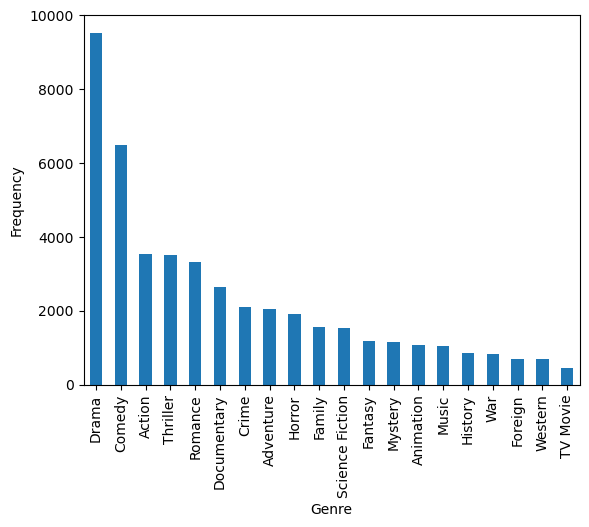

In [139]:
name_totals.sort_values(ascending=False).plot(kind='bar', xlabel='Genre', ylabel='Frequency');

This might be due to the frequency of different genres. We can find the number of ``True`` values in each genre column by summing each column.

<Axes: title={'center': 'Genre Frequency'}, xlabel='Genre', ylabel='Frequency'>

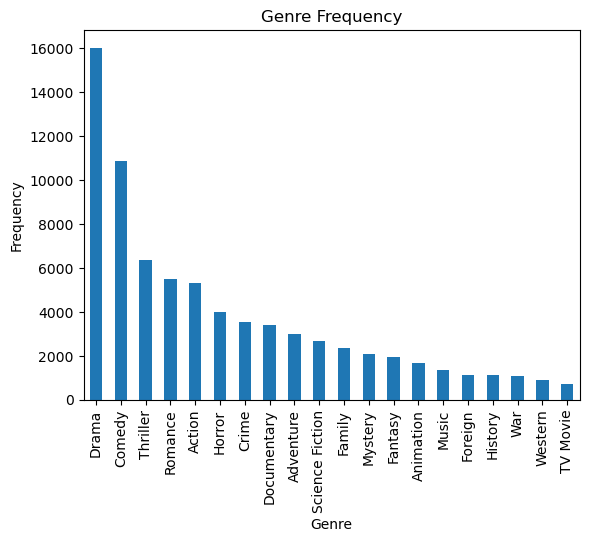

In [141]:
genre_totals = data[list(genre_set)].sum()
genre_totals.sort_values(ascending=False).plot(kind='bar', xlabel='Genre', ylabel='Frequency', title='Genre Frequency')

Now we can find the ratio of the two frequencies by dividing the ``name_totals`` by the ``genre_totals``

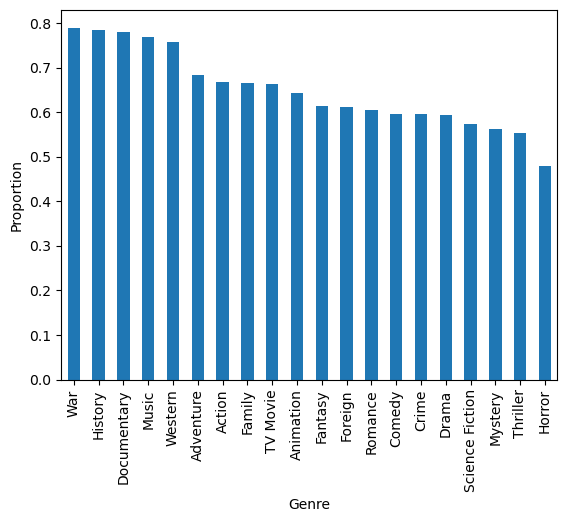

In [143]:
ratio_totals = name_totals / genre_totals
ratio_totals.sort_values(ascending=False).plot(kind='bar', xlabel='Genre', ylabel='Proportion');



[Official Python regular expression tutorial](https://docs.python.org/3/howto/regex.html#regex-howto)

<a id='stretch'></a>
## Further stretch tasks
[Back to Contents](#Contents)

<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> Create the same kind of columns for languages as for the genres
    <li> Hint: Use List comprehension and a lambda function for the best performance
</ul></div>

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

```python
# Process the 'spoken_languages' column to extract language names
languages = data.spoken_languages.apply(find_names)

# Create a set of all unique languages
language_set = set([l for lang in languages.values for l in lang])

# Create a DataFrame with one column per language
language_columns = pd.DataFrame({
    language: languages.apply(lambda x: language in x) for language in language_set
})

# Concatenate the new columns with the original DataFrame
data = pd.concat([data, language_columns], axis=1)

# Optional: Defragment the DataFrame for optimal performance
data = data.copy()


In [148]:
languages = data.spoken_languages.apply(find_names)

language_set = set([l for lang in languages.values for l in lang])

language_columns = pd.DataFrame({
    language: languages.apply(lambda x: language in x) for language in language_set
})

data = pd.concat([data, language_columns], axis=1)

data = data.copy()


<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> Using the dictionary <tt>christmas_sequence</tt> print out each verse of the <a href="https://en.wikipedia.org/wiki/The_Twelve_Days_of_Christmas_(song)">The Twelve Days of Christmas</a>.
    <li> For example, the third verse will be:
<i>On the third day of Christmas my true love sent to me three french hens, two turtle doves and a partridge in a pear tree.</i>
    <li> Hint: You will probably need nested loops.
</ul></div>

<details>
    <summary style="color:green;font-weight:bold">Click here for the answer to the task</summary>

> christmas_sequence = {<span style="color:red">"first"</span>: <span style="color:red">"a partridge in a pear tree"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"second"</span>: <span style="color:red">"two turtle doves"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"third"</span>: <span style="color:red">"three french hens"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"fourth"</span>: <span style="color:red">"four calling birds"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"fith"</span>: <span style="color:red">"five gold rings"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"sixth"</span>: <span style="color:red">"six geese a-laying"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"seventh"</span>: <span style="color:red">"seven swans a-swimming"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"eigth"</span>: <span style="color:red">"eight maids a-milking"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"nineth"</span>: <span style="color:red">"nine ladies dancing"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"thenth"</span>: <span style="color:red">"ten lords a-leaping"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"eleventh"</span>: <span style="color:red">"eleven pipers piping"</span>,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<span style="color:red">"twelth"</span>: <span style="color:red">"twelve drummers drumming"</span>}<br>
<br>
gifts = <span style="color:red">''</span><br>
<span style="color:green">for</span> day, gift <span style="color:green">in</span> christmas_sequence.items():<br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">if</span> day == <span style="color:red">'first'</span>:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;gifts = f<span style="color:red">'{gift}.'</span><br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">elif</span> day == <span style="color:red">'second'</span>:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;gifts = f<span style="color:red">'{gift} and {gifts}'</span><br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">else</span>:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;gifts = f<span style="color:red">'{gift}, {gifts}'</span><br>
&emsp;&emsp;&emsp;&emsp;<span style="color:green">print</span>(f<span style="color:red">"On the {day} day of Christmas my true love sent to me {gifts}"</span>)
</details>

<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> The function <tt>dir</tt> allows you to look at the methods and attributes associated with a python object. Pick one or more of the objects we have looked at to explore.
    <li> There are two main types of methods and attributes returned. What are they? What is the value in this approach?
</ul></div>

In [152]:
dir(1)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

<details>
    <summary style="color:green;font-weight:bold">Click here for more information on the task</summary>

In Python all information about objects is visible, so a naming convention is used to denote what should be considered private or dangerous to use directly.

One underscore before name indicates that the name is used as an internal name. Two underscores are used to denote a special private method or attribute. 

For example, adding is done with the ``__add__`` method

</details>



<div class="alert alert-block alert-info">
<b>Task:</b> <ul>
    <li> As you might have realised, variables are accesible between code cells. They are in the same <i>namespace</i>. We can look at what is in that namespace using the <tt>globals</tt> and <tt>locals</tt> functions.
    <li> What are the datatypes of the <tt>globals</tt> and <tt>locals</tt> function outputs?
    <li> There are lots of variables listed besides the ones you have created. Many of these are specific to this interface. Can you identify their purpose?
</ul></div>

In [155]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import json\nimport getpass\nimport hashlib\n\ndef import_pandas_safely():\n    try:\n        return __import__(\'pandas\')\n    except ImportError:\n        return False\n\n\n__pandas = import_pandas_safely()\n\n\ndef is_data_frame(v: str):\n    obj = eval(v)\n    if  isinstance(obj, __pandas.core.frame.DataFrame) or isinstance(obj, __pandas.core.series.Series):\n        return True\n\n\ndef dataframe_columns(var):\n    df = eval(var)\n    if isinstance(df, __pandas.core.series.Series):\n        return [[df.name, str(df.dtype)]]\n    return list(map(lambda col: [col, str(df[col].dtype)], df.columns))\n\n\ndef dtypes_str(frame):\n    return str(eval(frame).dtypes)\n\ndef dataframe_hash(var):\n    # Return a has

<details>
    <summary style="color:green;font-weight:bold">Click here for more information on the task</summary>

Both ``globals`` and ``locals`` return dictionaries. `locals` will return a different dictionary to `globals` when inside a function.

In a jupyter notebook ``globals`` will contain some of the special helper functions that load upon creation of the notebook. For more information on these, have a look at the <a href="https://ipython.readthedocs.io/en/stable/interactive/tutorial.html">iPython documentation</a>, specifically the commands that <a href="https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#history">recall the history of the commands you have run</a>

</details>



---
<a id="further"></a>
# Further reading
[Back to Contents](#Contents)

### Tutorials
- [Automate the Boring Stuff with Python](https://automatetheboringstuff.com/) is an online (and paper!) book with basic Python tutorials and inspiration on what to do with Python.
- [Towards Data Science](https://towardsdatascience.com/) has articles about data science and data science tools, many of which rely on Python.
- [stack**overflow**](https://stackoverflow.com/questions/tagged/python) is a question and answer site for programming questions.
- [scipy lectures](http://scipy-lectures.org/) is a tutorial for using Python in Scientific computing, including data analysis
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) is a collection of guides for *manipulating, transforming, and cleaning data; visualizing different types of data; and using data to build statistical or machine learning models.*
- [Practical Business Python](https://pbpython.com/roadmap.html) is a collection of blog posts on Python's use in business tasks.
- Examples of Python data analysis workflows, with practice datasets, can be found on [Kaggle](https://www.kaggle.com/code?sortBy=voteCount&language=Python&tagIds=13201)

### Pandas information
- [Pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Pandas comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)
- [Working with text data in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html). The official user guide.

### Useful packages
#### Plotting
- [MatPlotLib](https://matplotlib.org/) is the basis for the Pandas plotting and can get quite complicated. It has its own [cheatsheet](https://github.com/matplotlib/cheatsheets#cheatsheets), which can be useful for enhancing Pandas plots.
- [Seaborn](https://seaborn.pydata.org/) makes pretty plots with simple syntax, but is focused on specific statistical plots, not general purpose plotting. It is also based on MatPlotLib.

#### Data analysis
- [numpy](https://numpy.org/) is a numerical data manipulation package. Pandas relies heavily on numpy. There is an offical tutorial on [the absolute basics for beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)

#### Text analysis
- [Natural Language Toolkit](https://www.nltk.org/) is a general purpose Python package for language analysis, including [Sentiment analysis](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
- [spaCy](https://spacy.io/) is designed around high-volume, high performance natural language processing.
- [regex101](https://regex101.com/) allows you to test regualr expressions